In [18]:
#Question 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)


{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [14]:
sns.set_theme()

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#Loading the dataset

import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/online_shoppers_intention.csv")

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
#Handlng missing datas

missing = df.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [16]:
x = df.iloc[:, [5, 6]].values
x.shape

(12330, 2)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [26]:
df.duplicated().sum(), df.shape

(125, (12330, 18))

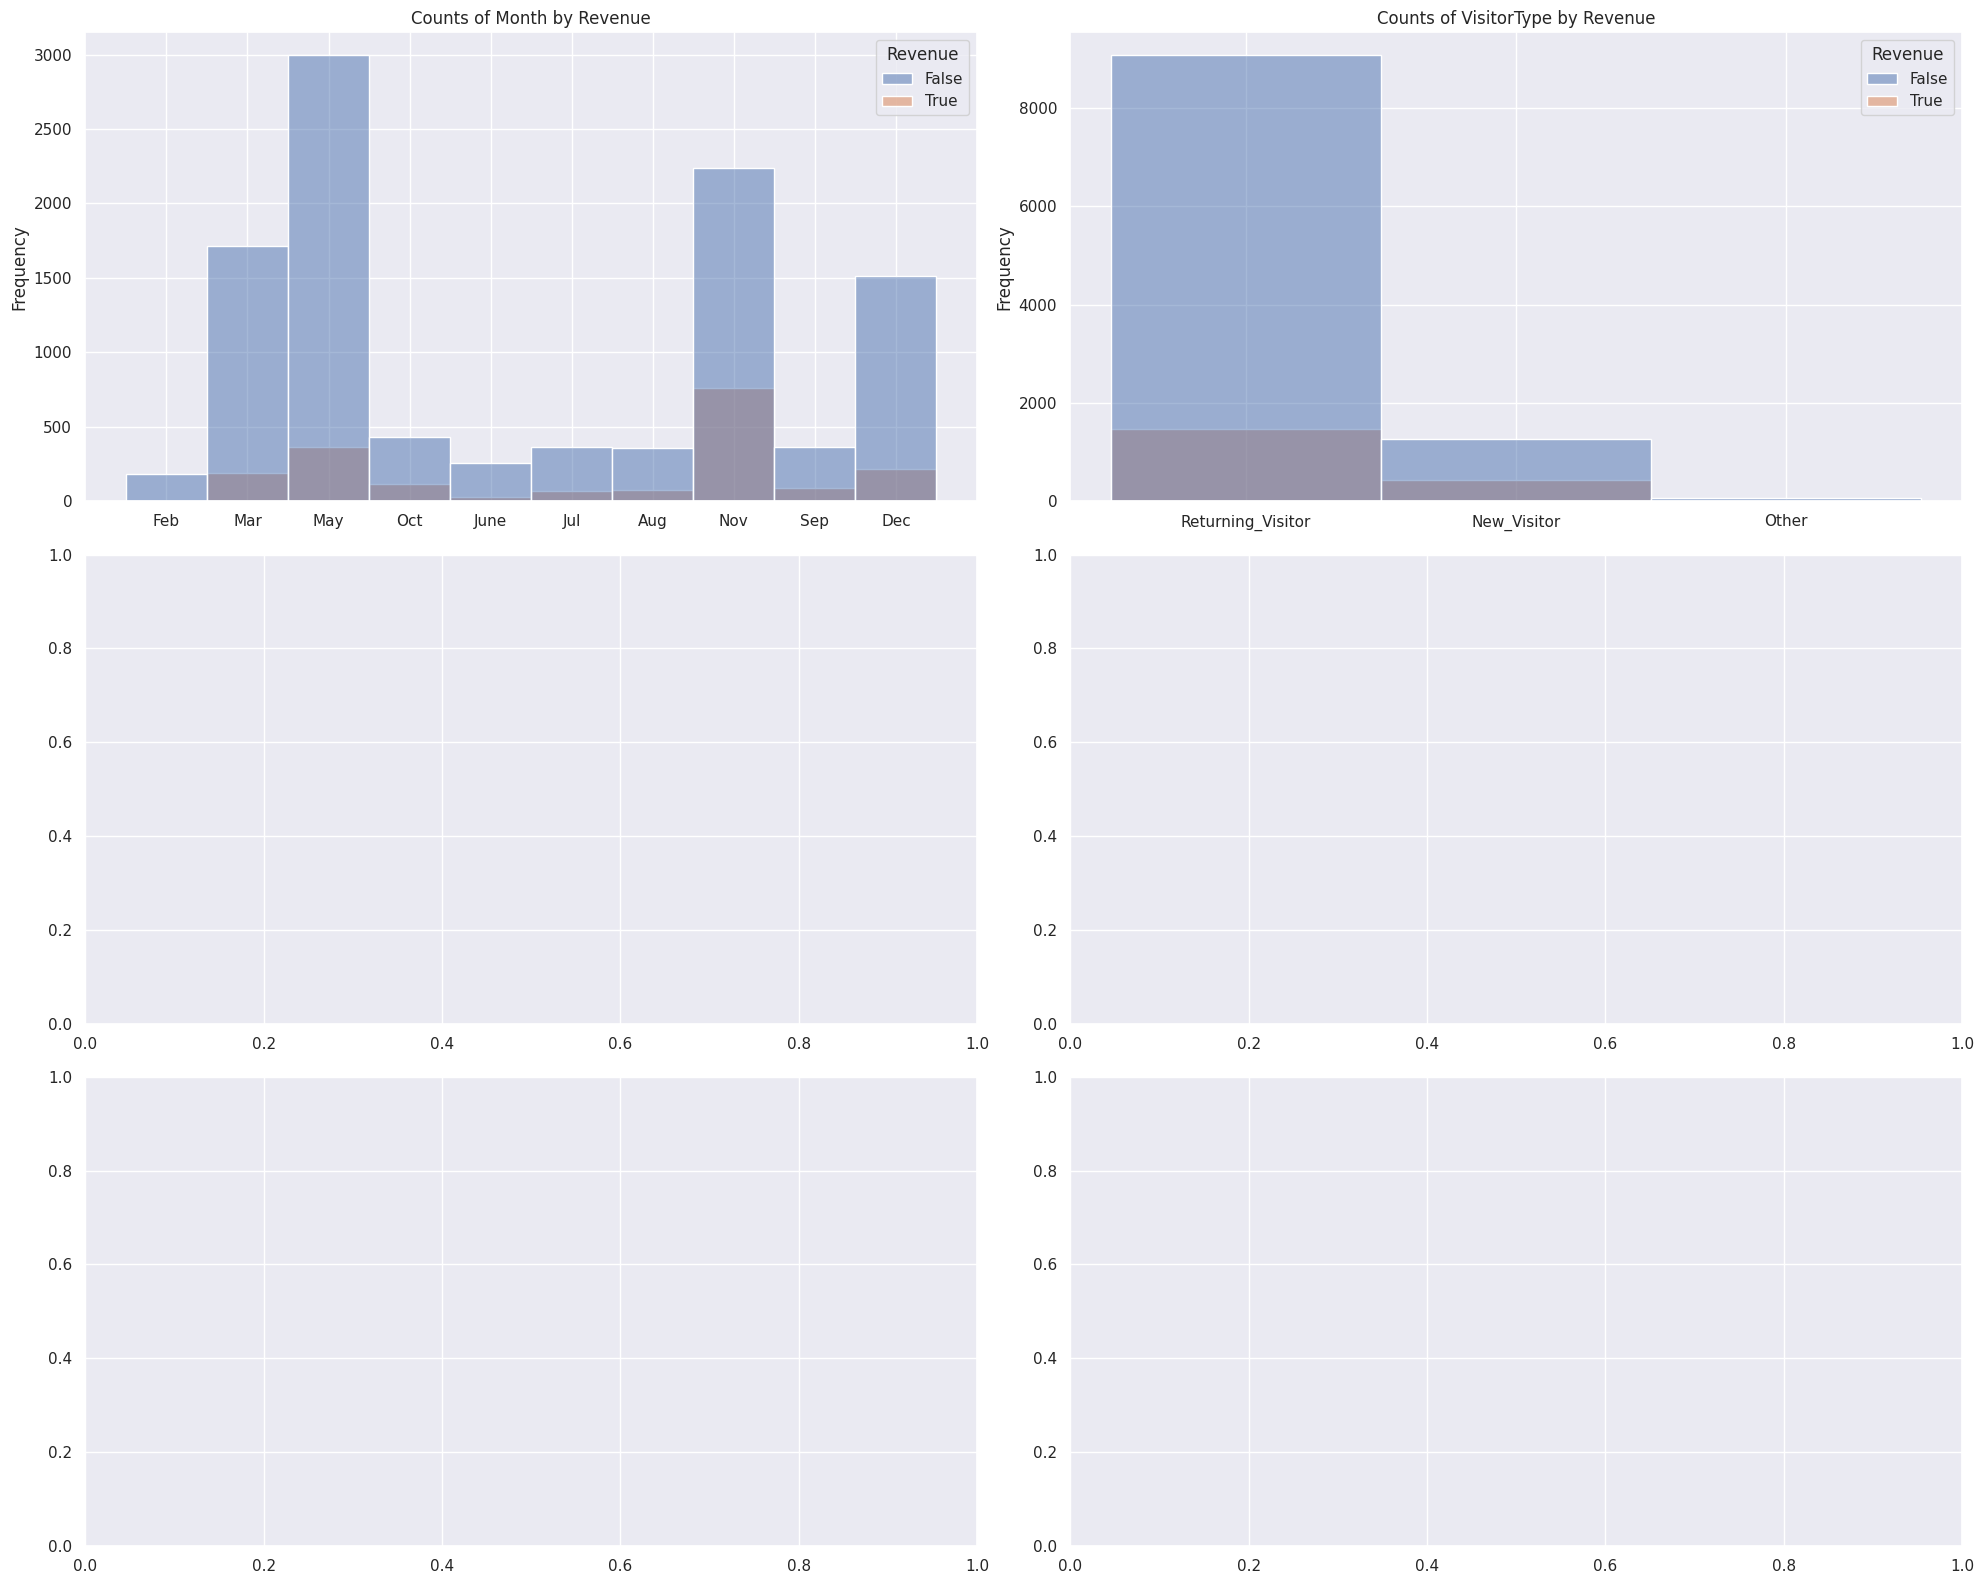

In [23]:
#Categorical features

fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='object').columns, axes.flatten()):
    sns.histplot(data=df, x=df[col].values, hue="Revenue", ax=ax)
    ax.set_title(f'Counts of {col} by Revenue')
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()



In [28]:
#OneHot Encoding

encoder = OneHotEncoder(sparse_output=False)

for col in df.select_dtypes(include='object'):
    transformed = encoder.fit_transform(df[[col]])

    encoded_df = pd.DataFrame(transformed, columns=[f"{col}_{category}" for category in encoder.categories_[0]]) # Create a DataFrame from the encoded columns

    df = df.join(encoded_df.set_index(df.index)) # Add the new columns to the original DataFrame


df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)

In [29]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [30]:
#Train-Test-Split

y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue']).to_list()]

In [31]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Random Baseline:
              precision    recall  f1-score   support

       False       0.83      0.49      0.62      2055
        True       0.16      0.48      0.24       411

    accuracy                           0.49      2466
   macro avg       0.49      0.49      0.43      2466
weighted avg       0.71      0.49      0.55      2466



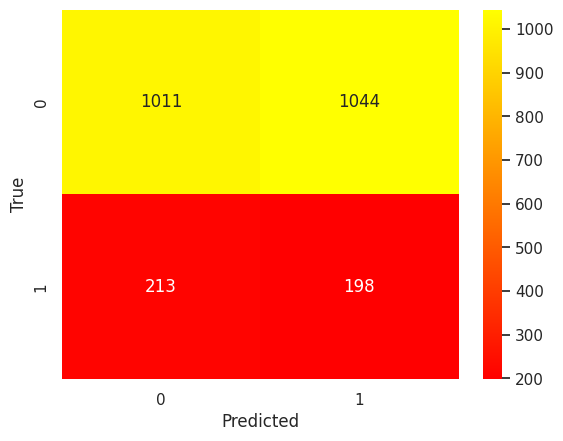

In [34]:
#Baseline using Random Classifier

majority_class_baseline = DummyClassifier(strategy='uniform')
majority_class_baseline.fit(X_train, y_train)
y_pred_majority = majority_class_baseline.predict(X_test)

print("Random Baseline:")
print(classification_report(y_test, y_pred_majority))

cm = confusion_matrix(y_test, y_pred_majority)
sns.heatmap(cm, annot=True, fmt="d", cmap="autumn")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       False       0.96      0.89      0.92      2055
        True       0.58      0.81      0.68       411

    accuracy                           0.87      2466
   macro avg       0.77      0.85      0.80      2466
weighted avg       0.90      0.87      0.88      2466



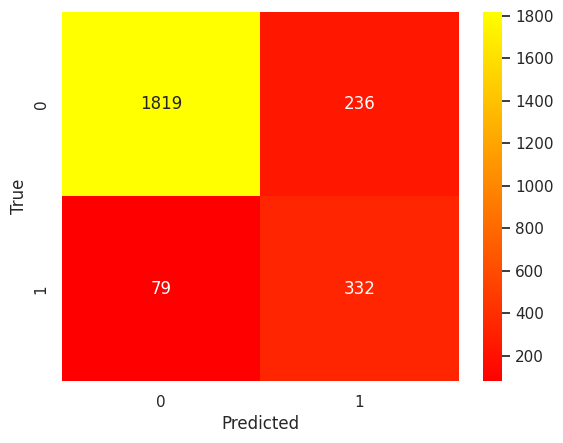

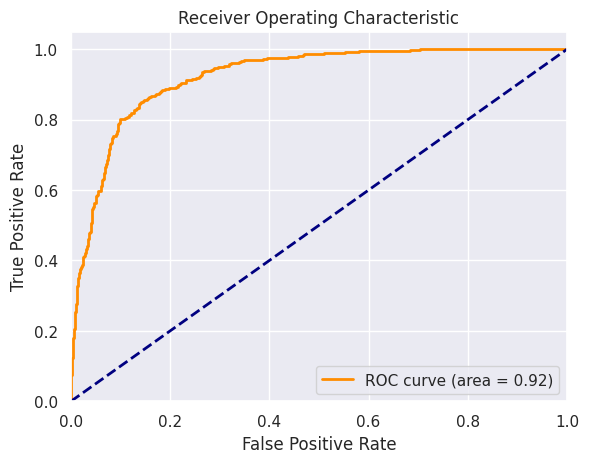

In [36]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=75, max_depth=10, min_samples_leaf=50, criterion='entropy', random_state=42))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="autumn")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

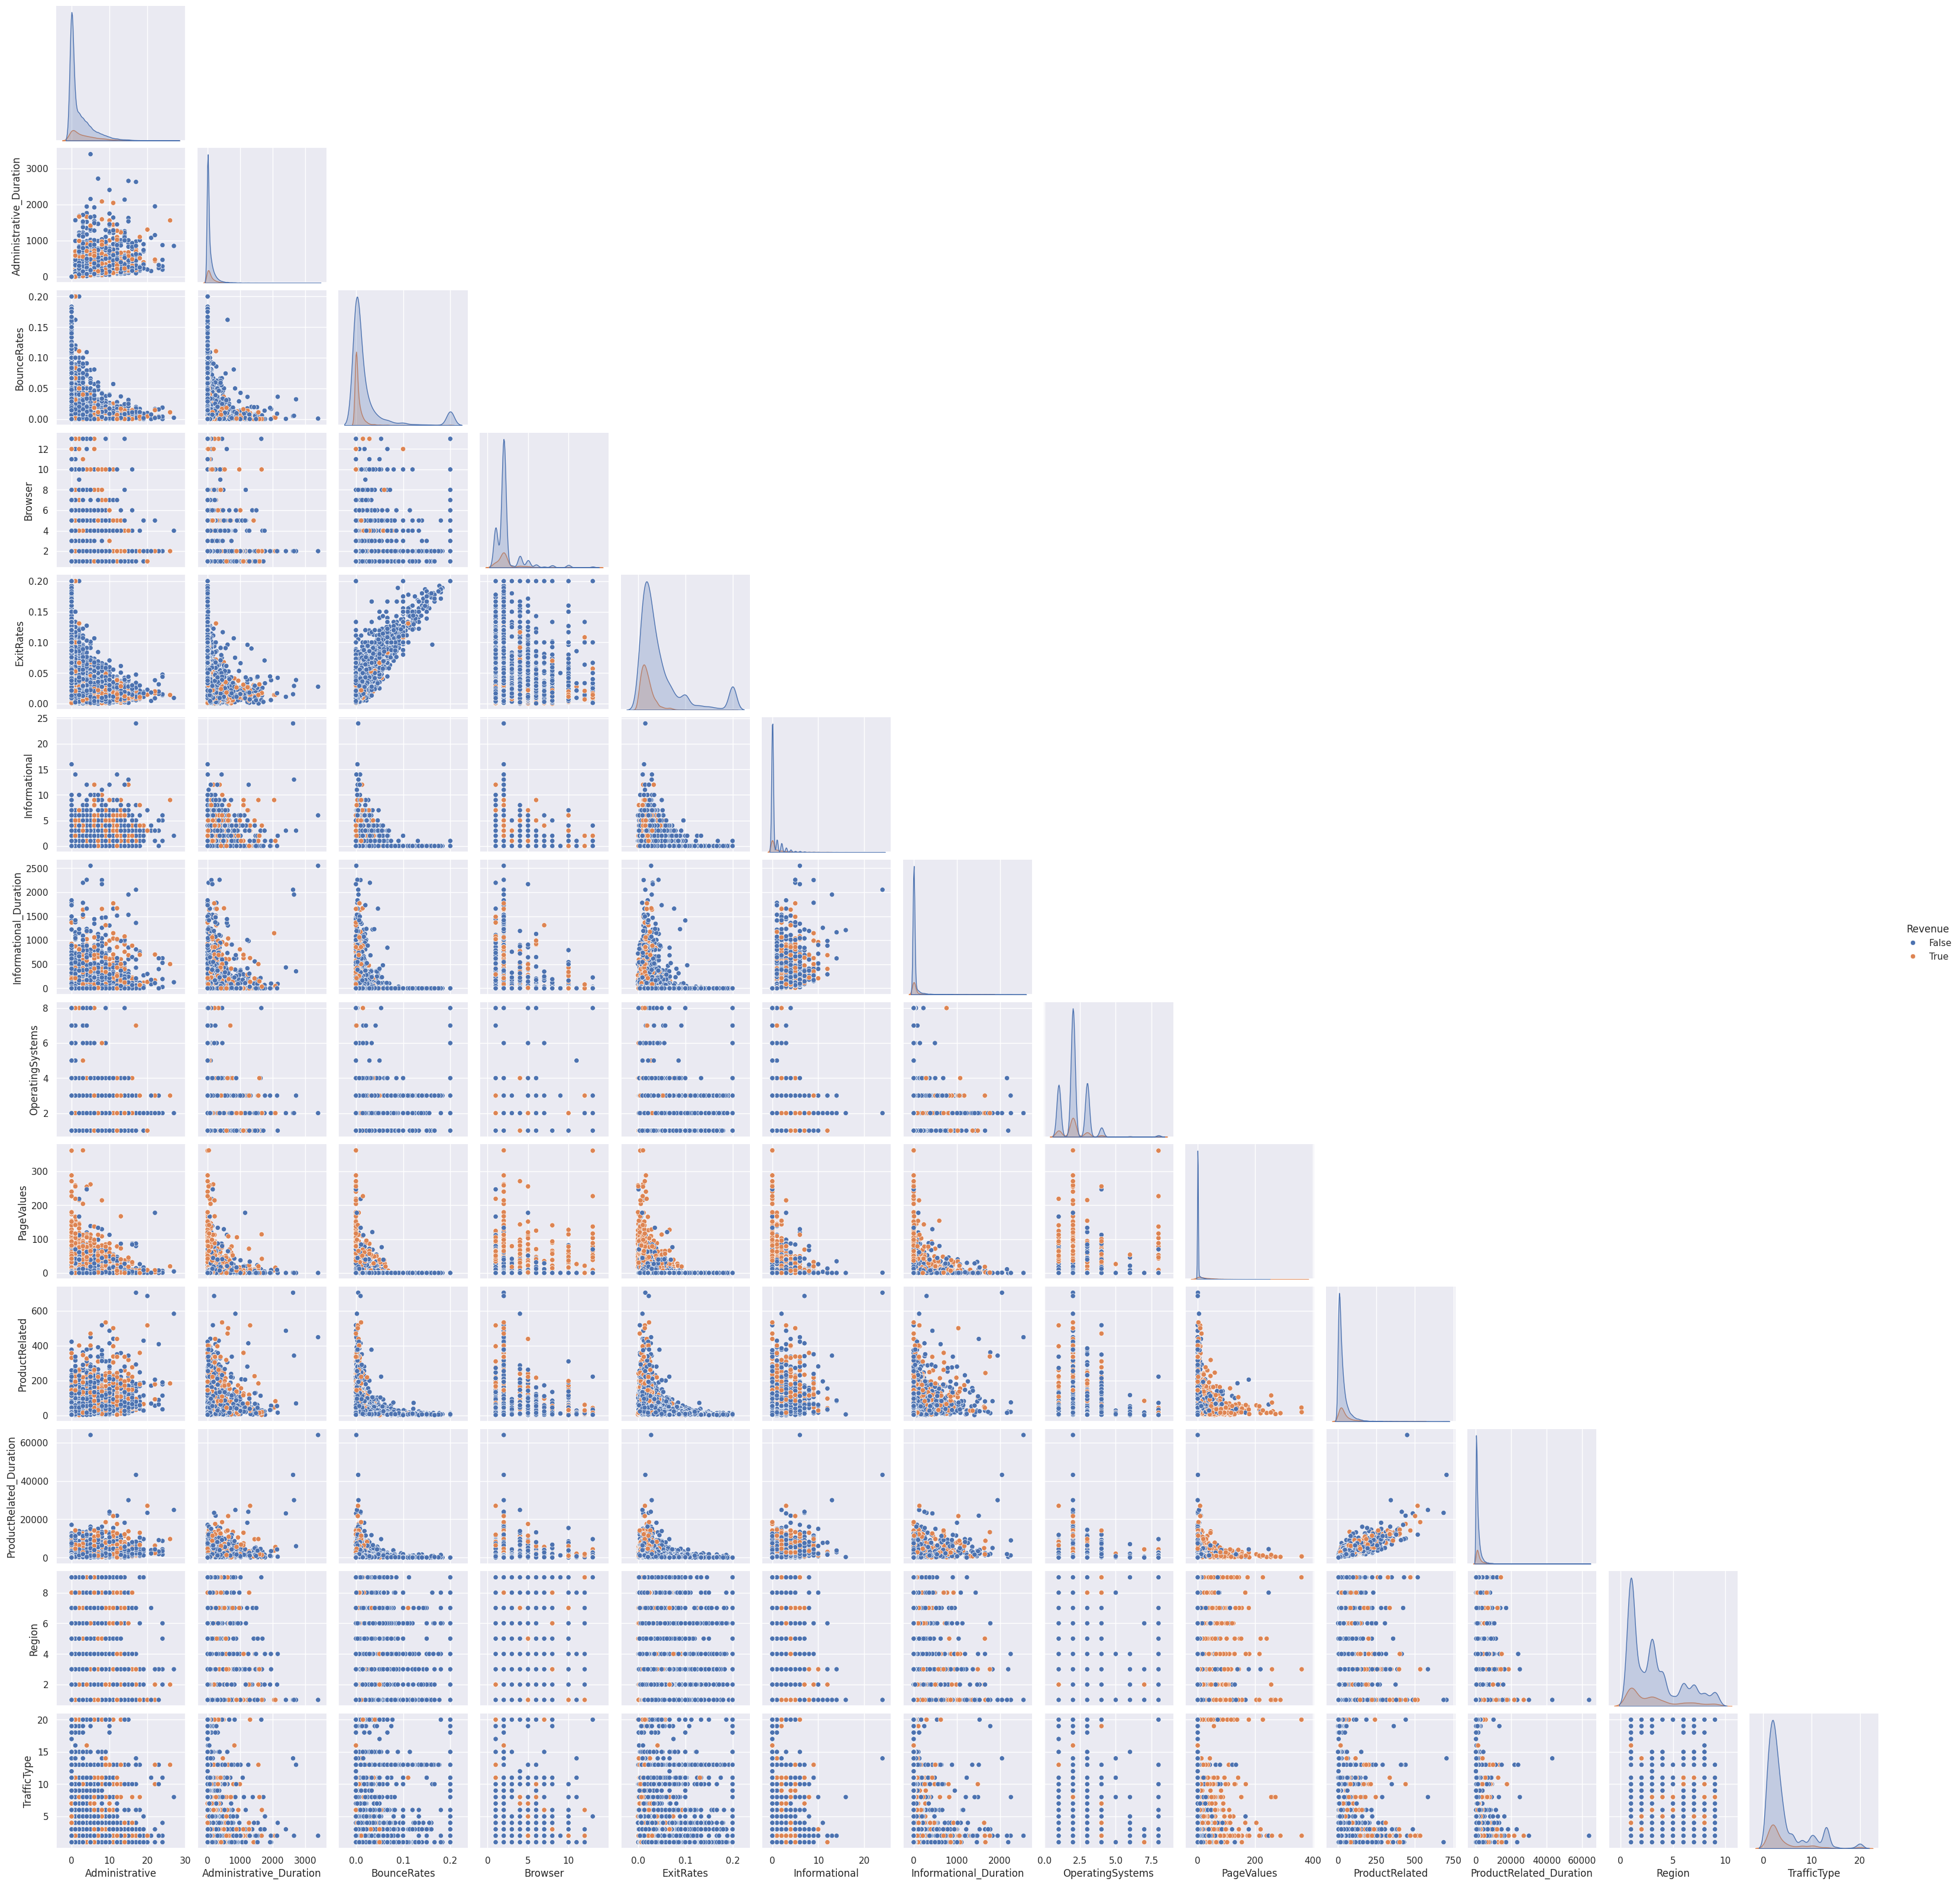

In [27]:
#Bivariate Analysis

sns.pairplot(df[df.select_dtypes(include=['number', 'bool']).columns.difference(['SpecialDay', 'Weekend'])], hue = 'Revenue', corner=True)